<a href="https://colab.research.google.com/github/Jefffish09/MachineLearning/blob/dev/Classification/binary/bilstm_binary_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense, GlobalMaxPool1D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, f1_score

In [2]:
seed = 2021
input_dim = 5000
output_dim = 32
max_len = 500
batch_size = 128
epochs = 100
dropout_rate = 0.2
earlystopping_patience = 10

In [3]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=input_dim)
x = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

print("x shape is {}, y shape is {}".format(x.shape, y.shape))
print("Classes: {}".format(np.unique(y)))
print("Total words: {}".format(len(np.unique(np.hstack(x)))))


17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

x shape is (50000,), y shape is (50000,)
Classes: [0 1]
Total words: 4998


In [4]:
# Preprocess the dataset

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)


In [5]:
def plot_perf(history):
  # Create a plot of accuracy and loss over time
  history_dict = history.history
  history_dict.keys()

  acc = history_dict["accuracy"]
  val_acc = history_dict["val_accuracy"]
  loss = history_dict["loss"]
  val_loss = history_dict["val_loss"]

  epochs = range(1, len(acc) + 1)

  # Use plot styling from seaborn.
  sns.set(style="darkgrid")
  # Increase the plot size and font size.
  sns.set(font_scale=1.5)
  plt.rcParams["figure.figsize"] = (12, 6)

  # Training and validation loss
  plt.plot(epochs, loss, "r", label="Training loss")
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, "b", label="Validation loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

  # Training and validation accuracy
  plt.plot(epochs, acc, "r", label="Training acc")
  plt.plot(epochs, val_acc, "b", label="Validation acc")
  plt.title("Training and validation accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(loc="lower right")
  plt.show()

KFold: 1 starts.
Epoch 1/100
176/176 [==============================] - 48s 78ms/step - loss: 0.6687 - accuracy: 0.5926 - val_loss: 0.5034 - val_accuracy: 0.7948
Epoch 2/100
176/176 [==============================] - 13s 74ms/step - loss: 0.4264 - accuracy: 0.8219 - val_loss: 0.3215 - val_accuracy: 0.8636
Epoch 3/100
176/176 [==============================] - 13s 73ms/step - loss: 0.2539 - accuracy: 0.9001 - val_loss: 0.2873 - val_accuracy: 0.8832
Epoch 4/100
176/176 [==============================] - 13s 74ms/step - loss: 0.2096 - accuracy: 0.9240 - val_loss: 0.2966 - val_accuracy: 0.8840
Epoch 5/100
176/176 [==============================] - 13s 74ms/step - loss: 0.1763 - accuracy: 0.9365 - val_loss: 0.3066 - val_accuracy: 0.8736
Epoch 6/100
176/176 [==============================] - 13s 75ms/step - loss: 0.1556 - accuracy: 0.9501 - val_loss: 0.3101 - val_accuracy: 0.8796
Epoch 7/100
176/176 [==============================] - 13s 75ms/step - loss: 0.1431 - accuracy: 0.9534 - val_loss

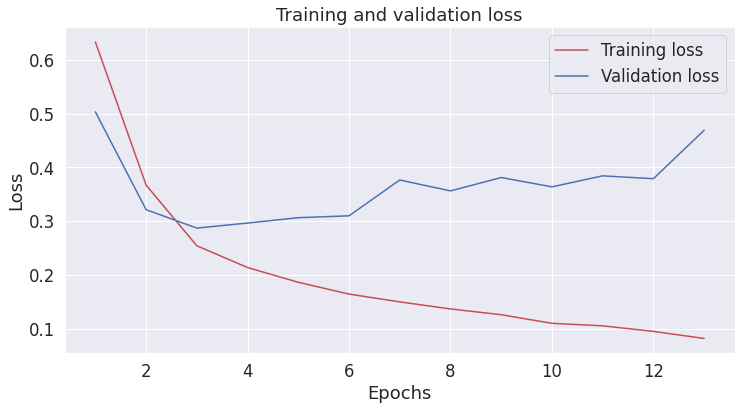

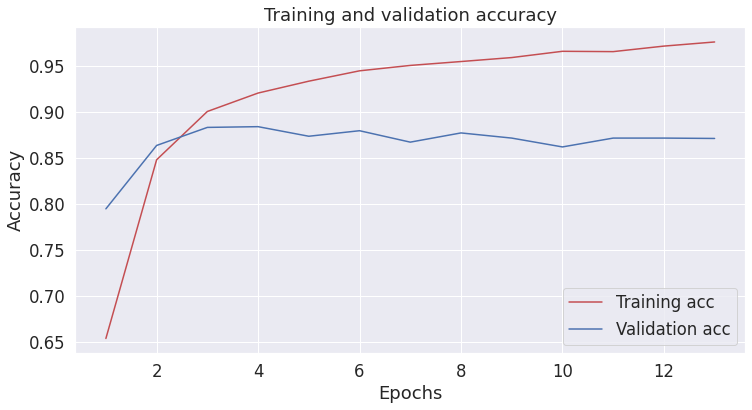

              precision    recall  f1-score   support

           0      0.877     0.889     0.883     12500
           1      0.888     0.876     0.882     12500

    accuracy                          0.882     25000
   macro avg      0.882     0.882     0.882     25000
weighted avg      0.882     0.882     0.882     25000


KFold: 2 starts.
Epoch 1/100
176/176 [==============================] - 17s 79ms/step - loss: 0.6751 - accuracy: 0.5548 - val_loss: 0.5399 - val_accuracy: 0.7372
Epoch 2/100
176/176 [==============================] - 13s 76ms/step - loss: 0.4412 - accuracy: 0.8002 - val_loss: 0.3465 - val_accuracy: 0.8480
Epoch 3/100
176/176 [==============================] - 13s 75ms/step - loss: 0.3146 - accuracy: 0.8677 - val_loss: 0.3126 - val_accuracy: 0.8744
Epoch 4/100
176/176 [==============================] - 13s 75ms/step - loss: 0.2201 - accuracy: 0.9180 - val_loss: 0.3125 - val_accuracy: 0.8736
Epoch 5/100
176/176 [==============================] - 13s 75ms/step - loss

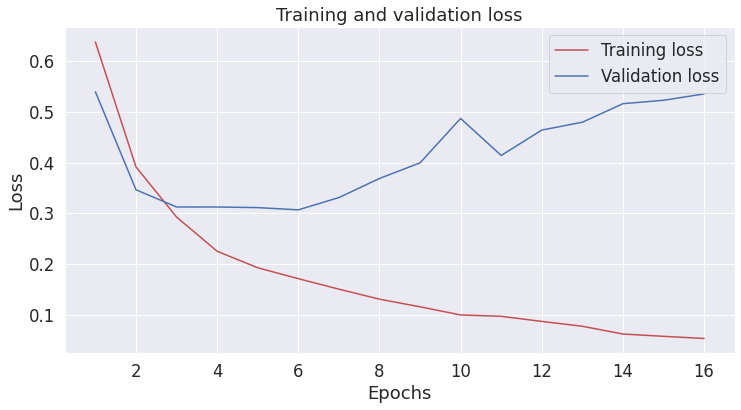

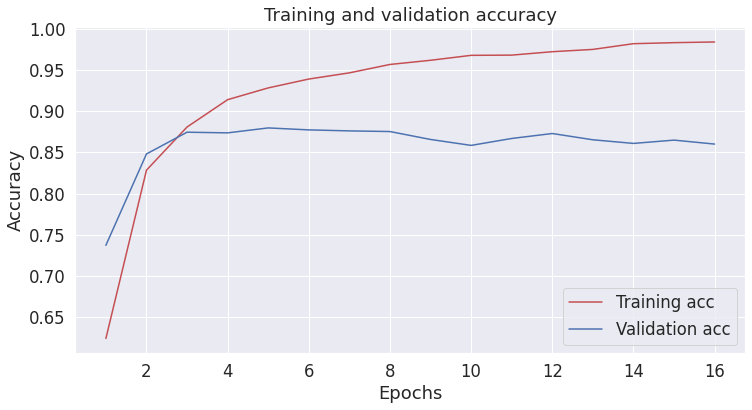

              precision    recall  f1-score   support

           0      0.859     0.888     0.873     12500
           1      0.884     0.854     0.869     12500

    accuracy                          0.871     25000
   macro avg      0.871     0.871     0.871     25000
weighted avg      0.871     0.871     0.871     25000


KFold: 3 starts.
Epoch 1/100
176/176 [==============================] - 17s 79ms/step - loss: 0.6786 - accuracy: 0.5469 - val_loss: 0.6380 - val_accuracy: 0.6076
Epoch 2/100
176/176 [==============================] - 13s 76ms/step - loss: 0.5966 - accuracy: 0.6721 - val_loss: 0.4353 - val_accuracy: 0.8064
Epoch 3/100
176/176 [==============================] - 13s 75ms/step - loss: 0.3822 - accuracy: 0.8348 - val_loss: 0.3012 - val_accuracy: 0.8752
Epoch 4/100
176/176 [==============================] - 13s 75ms/step - loss: 0.2445 - accuracy: 0.9041 - val_loss: 0.2818 - val_accuracy: 0.8840
Epoch 5/100
176/176 [==============================] - 13s 75ms/step - loss

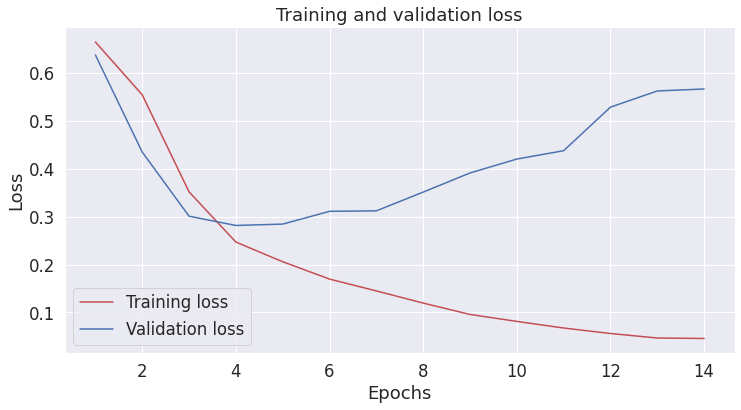

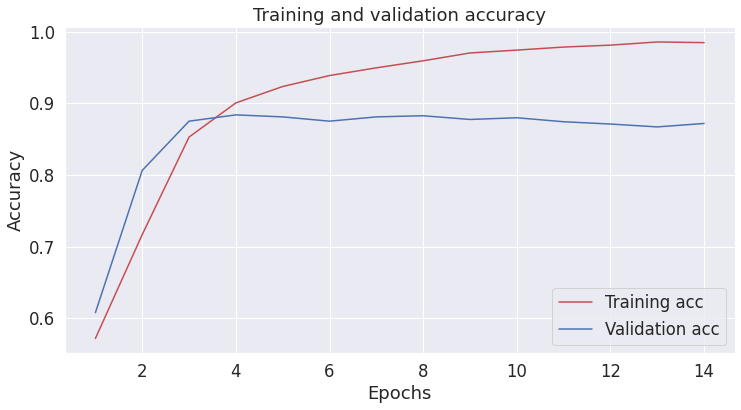

              precision    recall  f1-score   support

           0      0.861     0.899     0.880     12500
           1      0.895     0.854     0.874     12500

    accuracy                          0.877     25000
   macro avg      0.878     0.877     0.877     25000
weighted avg      0.878     0.877     0.877     25000


KFold: 4 starts.
Epoch 1/100
176/176 [==============================] - 17s 80ms/step - loss: 0.6497 - accuracy: 0.5888 - val_loss: 0.4349 - val_accuracy: 0.8396
Epoch 2/100
176/176 [==============================] - 13s 76ms/step - loss: 0.2930 - accuracy: 0.8864 - val_loss: 0.2802 - val_accuracy: 0.8852
Epoch 3/100
176/176 [==============================] - 13s 76ms/step - loss: 0.2130 - accuracy: 0.9230 - val_loss: 0.2825 - val_accuracy: 0.8812
Epoch 4/100
176/176 [==============================] - 13s 76ms/step - loss: 0.1818 - accuracy: 0.9354 - val_loss: 0.3050 - val_accuracy: 0.8788
Epoch 5/100
176/176 [==============================] - 13s 76ms/step - loss

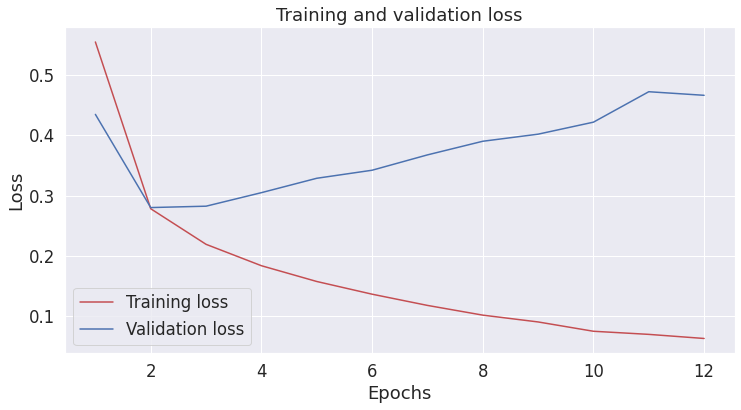

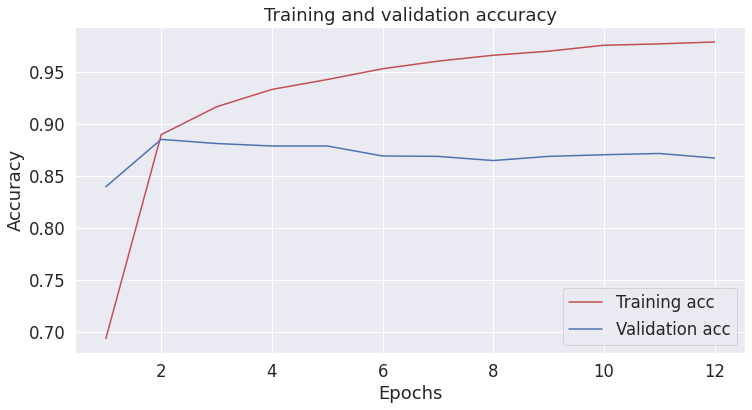

              precision    recall  f1-score   support

           0      0.875     0.891     0.883     12500
           1      0.889     0.873     0.881     12500

    accuracy                          0.882     25000
   macro avg      0.882     0.882     0.882     25000
weighted avg      0.882     0.882     0.882     25000


KFold: 5 starts.
Epoch 1/100
176/176 [==============================] - 17s 81ms/step - loss: 0.6325 - accuracy: 0.5996 - val_loss: 0.3286 - val_accuracy: 0.8572
Epoch 2/100
176/176 [==============================] - 13s 77ms/step - loss: 0.2856 - accuracy: 0.8843 - val_loss: 0.2823 - val_accuracy: 0.8752
Epoch 3/100
176/176 [==============================] - 14s 77ms/step - loss: 0.2152 - accuracy: 0.9185 - val_loss: 0.2813 - val_accuracy: 0.8744
Epoch 4/100
176/176 [==============================] - 13s 77ms/step - loss: 0.1885 - accuracy: 0.9321 - val_loss: 0.3275 - val_accuracy: 0.8752
Epoch 5/100
176/176 [==============================] - 13s 76ms/step - loss

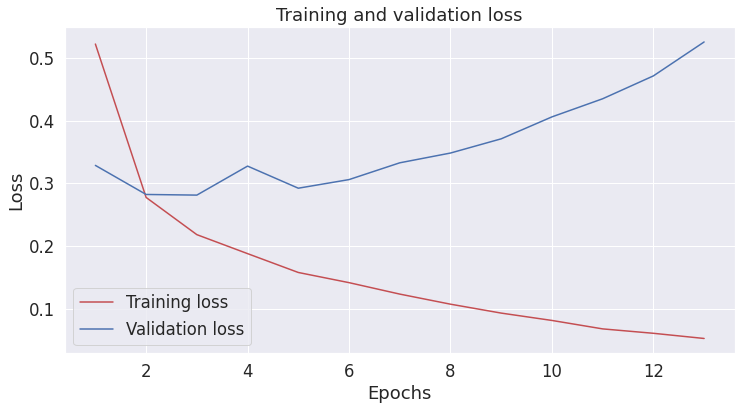

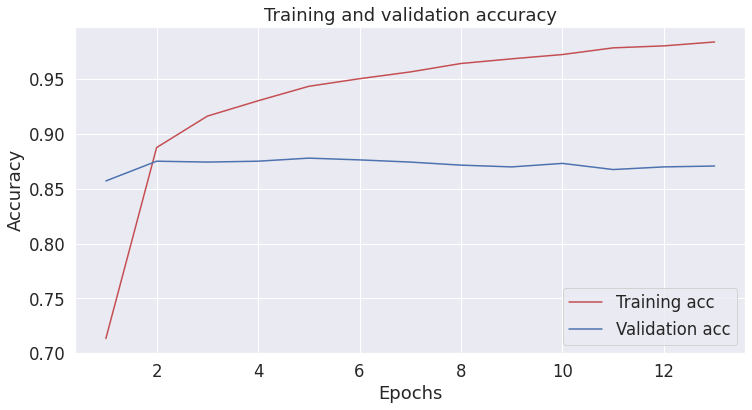

              precision    recall  f1-score   support

           0      0.853     0.908     0.880     12500
           1      0.901     0.844     0.872     12500

    accuracy                          0.876     25000
   macro avg      0.877     0.876     0.876     25000
weighted avg      0.877     0.876     0.876     25000


KFold: 6 starts.
Epoch 1/100
176/176 [==============================] - 17s 81ms/step - loss: 0.6639 - accuracy: 0.5705 - val_loss: 0.5490 - val_accuracy: 0.7484
Epoch 2/100
176/176 [==============================] - 14s 77ms/step - loss: 0.5564 - accuracy: 0.7085 - val_loss: 0.3670 - val_accuracy: 0.8372
Epoch 3/100
176/176 [==============================] - 14s 77ms/step - loss: 0.4168 - accuracy: 0.8145 - val_loss: 0.3185 - val_accuracy: 0.8668
Epoch 4/100
176/176 [==============================] - 14s 77ms/step - loss: 0.2925 - accuracy: 0.8829 - val_loss: 0.2917 - val_accuracy: 0.8824
Epoch 5/100
176/176 [==============================] - 14s 77ms/step - loss

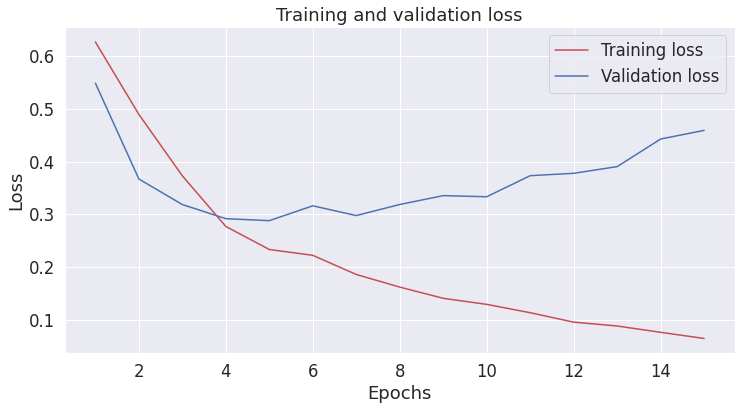

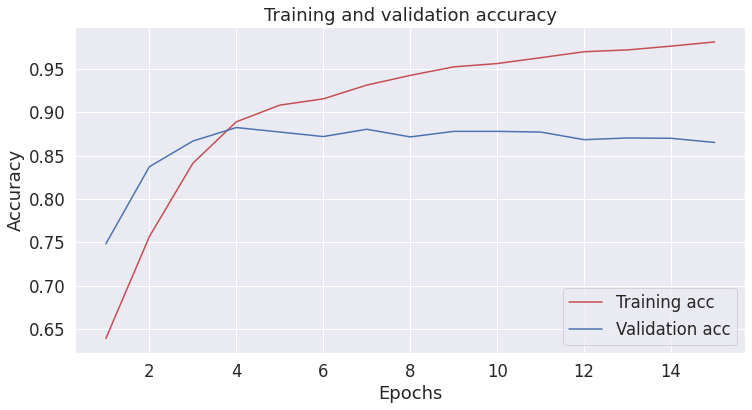

              precision    recall  f1-score   support

           0      0.883     0.867     0.875     12500
           1      0.869     0.885     0.877     12500

    accuracy                          0.876     25000
   macro avg      0.876     0.876     0.876     25000
weighted avg      0.876     0.876     0.876     25000


KFold: 7 starts.
Epoch 1/100
176/176 [==============================] - 17s 82ms/step - loss: 0.6377 - accuracy: 0.6015 - val_loss: 0.3754 - val_accuracy: 0.8476
Epoch 2/100
176/176 [==============================] - 14s 79ms/step - loss: 0.2921 - accuracy: 0.8822 - val_loss: 0.3112 - val_accuracy: 0.8656
Epoch 3/100
176/176 [==============================] - 14s 78ms/step - loss: 0.2181 - accuracy: 0.9182 - val_loss: 0.2764 - val_accuracy: 0.8940
Epoch 4/100
176/176 [==============================] - 14s 78ms/step - loss: 0.1832 - accuracy: 0.9336 - val_loss: 0.2814 - val_accuracy: 0.8904
Epoch 5/100
176/176 [==============================] - 14s 78ms/step - loss

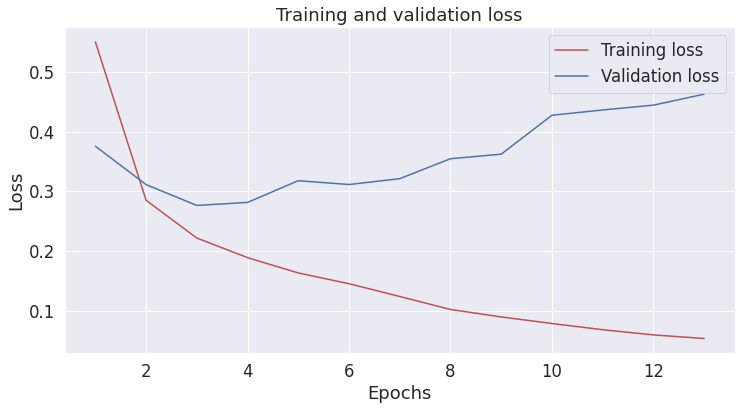

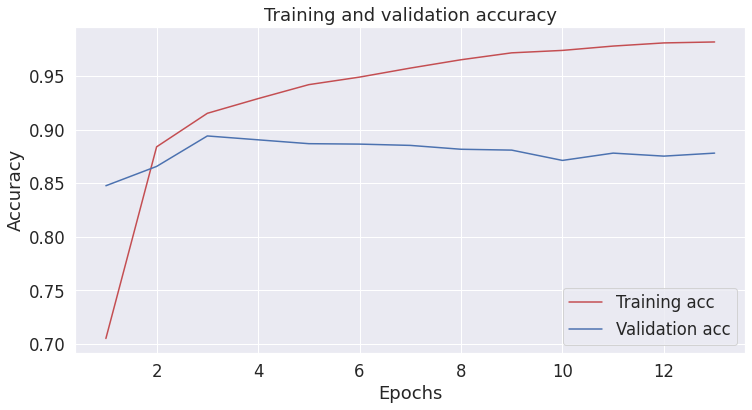

              precision    recall  f1-score   support

           0      0.886     0.870     0.878     12500
           1      0.872     0.889     0.880     12500

    accuracy                          0.879     25000
   macro avg      0.879     0.879     0.879     25000
weighted avg      0.879     0.879     0.879     25000


KFold: 8 starts.
Epoch 1/100
176/176 [==============================] - 18s 82ms/step - loss: 0.6781 - accuracy: 0.5567 - val_loss: 0.5483 - val_accuracy: 0.7192
Epoch 2/100
176/176 [==============================] - 14s 78ms/step - loss: 0.5197 - accuracy: 0.7464 - val_loss: 0.3285 - val_accuracy: 0.8620
Epoch 3/100
176/176 [==============================] - 14s 78ms/step - loss: 0.3017 - accuracy: 0.8763 - val_loss: 0.2903 - val_accuracy: 0.8800
Epoch 4/100
176/176 [==============================] - 14s 78ms/step - loss: 0.2347 - accuracy: 0.9083 - val_loss: 0.2770 - val_accuracy: 0.8868
Epoch 5/100
176/176 [==============================] - 14s 77ms/step - loss

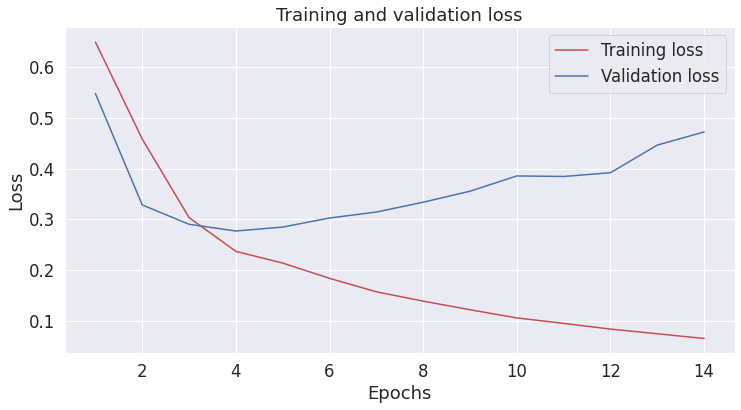

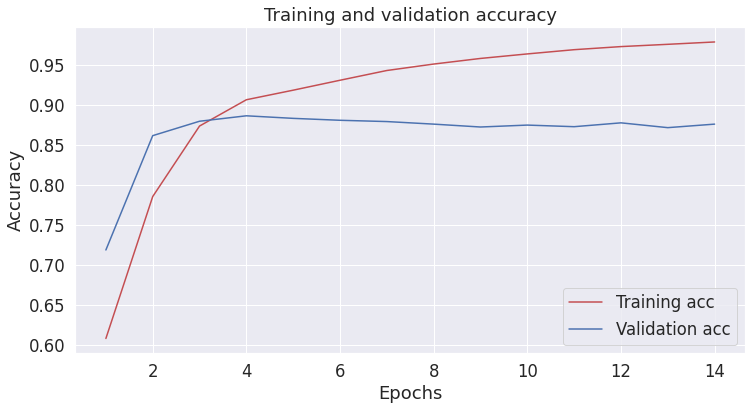

              precision    recall  f1-score   support

           0      0.894     0.863     0.878     12500
           1      0.868     0.898     0.882     12500

    accuracy                          0.880     25000
   macro avg      0.881     0.880     0.880     25000
weighted avg      0.881     0.880     0.880     25000


KFold: 9 starts.
Epoch 1/100
176/176 [==============================] - 18s 83ms/step - loss: 0.6487 - accuracy: 0.5803 - val_loss: 0.3124 - val_accuracy: 0.8720
Epoch 2/100
176/176 [==============================] - 14s 78ms/step - loss: 0.2804 - accuracy: 0.8886 - val_loss: 0.2688 - val_accuracy: 0.8844
Epoch 3/100
176/176 [==============================] - 14s 78ms/step - loss: 0.2190 - accuracy: 0.9163 - val_loss: 0.2717 - val_accuracy: 0.8856
Epoch 4/100
176/176 [==============================] - 14s 78ms/step - loss: 0.1825 - accuracy: 0.9335 - val_loss: 0.2835 - val_accuracy: 0.8812
Epoch 5/100
176/176 [==============================] - 14s 78ms/step - loss

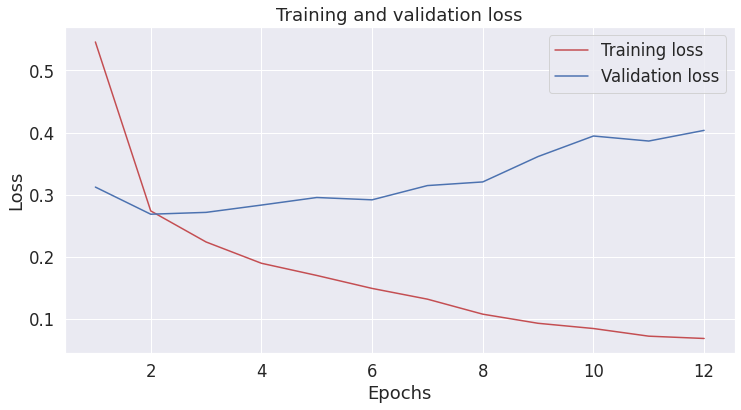

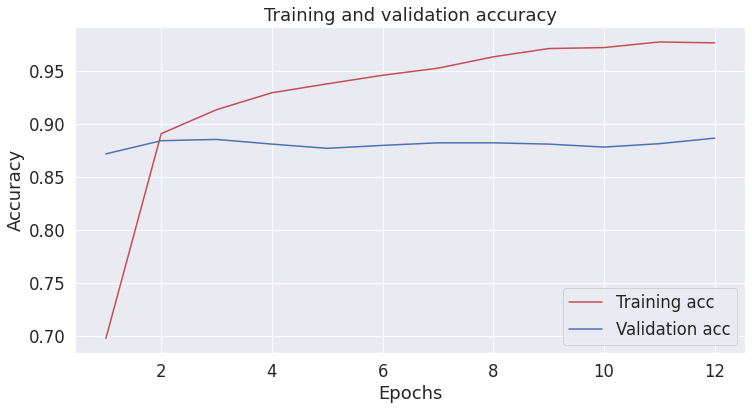

              precision    recall  f1-score   support

           0      0.870     0.897     0.883     12500
           1      0.894     0.865     0.879     12500

    accuracy                          0.881     25000
   macro avg      0.882     0.881     0.881     25000
weighted avg      0.882     0.881     0.881     25000


KFold: 10 starts.
Epoch 1/100
176/176 [==============================] - 18s 83ms/step - loss: 0.6533 - accuracy: 0.5842 - val_loss: 0.3112 - val_accuracy: 0.8668
Epoch 2/100
176/176 [==============================] - 14s 79ms/step - loss: 0.2853 - accuracy: 0.8840 - val_loss: 0.2859 - val_accuracy: 0.8824
Epoch 3/100
176/176 [==============================] - 14s 79ms/step - loss: 0.2215 - accuracy: 0.9161 - val_loss: 0.2709 - val_accuracy: 0.8884
Epoch 4/100
176/176 [==============================] - 14s 79ms/step - loss: 0.1853 - accuracy: 0.9317 - val_loss: 0.3096 - val_accuracy: 0.8696
Epoch 5/100
176/176 [==============================] - 14s 79ms/step - los

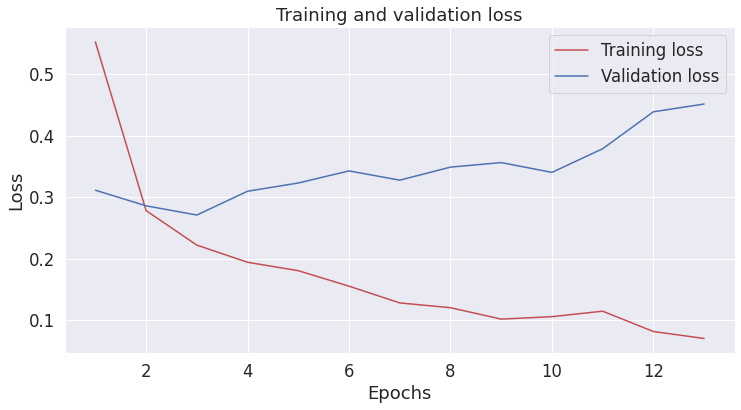

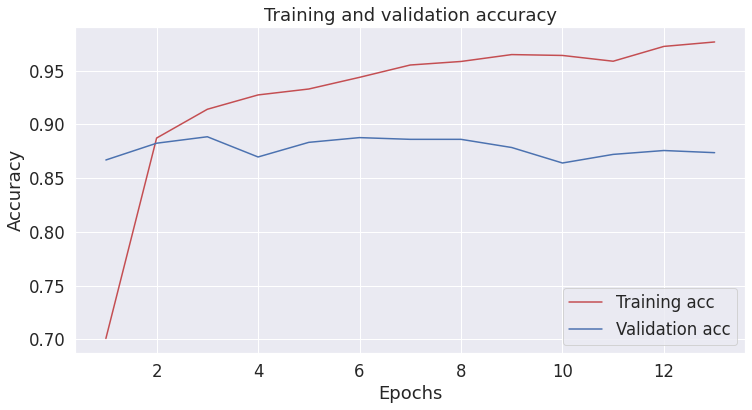

              precision    recall  f1-score   support

           0      0.888     0.870     0.879     12500
           1      0.872     0.891     0.881     12500

    accuracy                          0.880     25000
   macro avg      0.880     0.880     0.880     25000
weighted avg      0.880     0.880     0.880     25000


Average accuracy: 0.8785 (+/- 0.0034)
Average loss: 0.2892 (+/- 0.0091)
Average F1: 0.8778 (+/- 0.0045)


In [6]:
# Create and train the model

earlystop_callback = EarlyStopping(
  monitor="val_loss",
  min_delta=0.0001,
  patience=earlystopping_patience,
  restore_best_weights=True)

kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
model = None
cv_acc = []
cv_loss = []
cv_f1 = []

for n, (train, valid) in enumerate(kfold.split(x_train, y_train)):

  print("KFold: {} starts.".format(n + 1))
  del model
  tf.keras.backend.clear_session()
  
  model = Sequential([
    Embedding(input_dim=input_dim, output_dim=output_dim, input_length=max_len),
    Bidirectional(LSTM(units=100, dropout=0.2, activation="tanh", recurrent_dropout=0.0, recurrent_activation="sigmoid", unroll=False, use_bias=True, return_sequences=True)),
    GlobalMaxPool1D(),
    Dense(units=64, activation="relu"),
    Dropout(rate=dropout_rate),
    # Output layer
    Dense(units=1, activation="sigmoid")
  ])

  model.compile(
      loss="binary_crossentropy",
      optimizer="adam",
      metrics=["accuracy"]
  )

  # model.summary()

  history = model.fit(
      x=x_train[train],
      y=y_train[train],
      validation_data=(x_train[valid], y_train[valid]),
      batch_size=batch_size,
      epochs=epochs,
      verbose=1,
      callbacks=[earlystop_callback]
  )

  loss, acc = model.evaluate(x=x_test, y=y_test, verbose=1)
  cv_acc.append(acc)
  cv_loss.append(loss)

  plot_perf(history)

  # np.argmax(model.predict(x), axis=-1), if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).
  # (model.predict(x) > 0.5).astype("int32"), if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).
  y_pred = (model.predict(x_test) > 0.5).astype("int32")
  report = classification_report(y_true=y_test, y_pred=y_pred, digits=3, output_dict=False)
  print(report)

  f1 = f1_score(y_true=y_test, y_pred=y_pred, average="binary")
  cv_f1.append(f1)

  print("")

print("Average accuracy: {:.4f} (+/- {:.4f})".format(np.mean(cv_acc), np.std(cv_acc)))
print("Average loss: {:.4f} (+/- {:.4f})".format(np.mean(cv_loss), np.std(cv_loss)))
print("Average F1: {:.4f} (+/- {:.4f})".format(np.mean(cv_f1), np.std(cv_f1)))
